### Introduction

In this notebook, we are going to replicate the experiments in paper *Fairness Beyond Disparate Treatment & Disparate Impact: Learning Classification without Disparate Mistreatment* (Zafar, Muhammad Bilal, et al.)

This paper is mainly about fairness of machine learning algorithms. There are several fairness metrics, and this paper focuses on one of them: **Disparate Mistreatment**. According to the paper, **disparate mistreatment means with respect to a sensitive attribute, the model would have misclassification rates differ for groups of people having different values of that sensitive attribute (e.g., blacks and whites).** There are also multiple ways to measure the so-called misclassification rate, where the paper mainly discusses two of them: false positive rate and false negative rate. Here are the definitions:

$$FPR = \frac{FP}{FP + TN}$$

$$FNR = \frac{FN}{FN + TP}$$

Therefore, the paper discusses how accuracy would suffer when we add constraints about disparate mistreatment using FPR or FNR. The experiments contain three parts: one synthesized experiment, one real data experiments, and finally the comparison for different mistreatment constraints. We are going to replicate each of them.

### Previous Code and New Contributions

The paper has its github but the codes are out-dated since it was written in 2018. Also, certain functions are erased in Python packages now. We modifed the code from Python 2 to Python 3 to replicate the results. More importantly, we integrate all experiments in one Jupyter notebook to provide better visualizations instead of the original .py files

### Part 1. Synthesized Data for Accuracy-Fairness Tradeoffs

#### 1.1 Data Generating Process

This part generates a dataset with a multivariate normal distribution. The dataset consists of two non-sensitive features and one sensitive feature. We use *generate_synthetic_data.py* to finish the task, where the function can generate certain kinds of synthetic data suffering from different disparate mistreatment effect. The way to achieve it is relatively simple that the function generates different multivariate normal distributions for non-sensitive features when sensitive features are different (i.e. differet covariance matrices and means).

With this technique, we generate a dataset suffering from different disparate mistreatment effect both on FPR and FNR, which means for different values of z (the sensitive attribute), the classifer aiming to optimize accuracy would have different FPR and FNR. Codes below generate the dataset:

(**Note: the results are slightly different from the original ones in the paper, this happens because data is a bit randomized**)


In [6]:
import pandas as pd
import sys
#Please change the path according to your own local device!
sys.path.append(r'C:\Users\72313\Desktop\哥大\4579\Replicate-Paper-main\fair-classification\fair_classification')
import warnings
warnings.filterwarnings('ignore')

In [7]:
from synthetic_data_demo.decision_boundary_demo import *

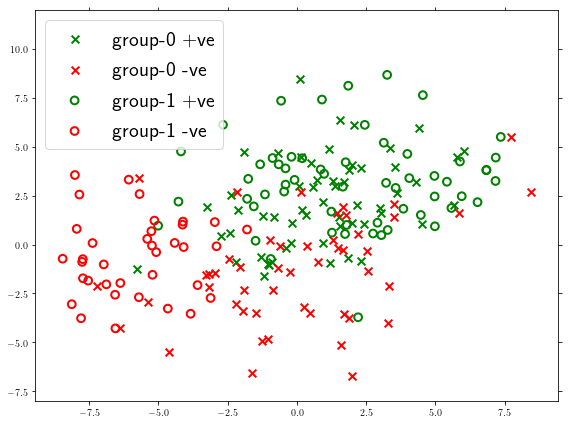

== Unconstrained (original) classifier ==


Accuracy: 0.821
||  s  || FPR. || FNR. ||
||  0  || 0.27 || 0.23 ||
||  1  || 0.10 || 0.12 ||



-----------------------------------------------------------------------------------

== Classifier with fairness constraint ==


=== Constraints on FPR ===


Accuracy: 0.768
||  s  || FPR. || FNR. ||
||  0  || 0.20 || 0.36 ||
||  1  || 0.20 || 0.17 ||




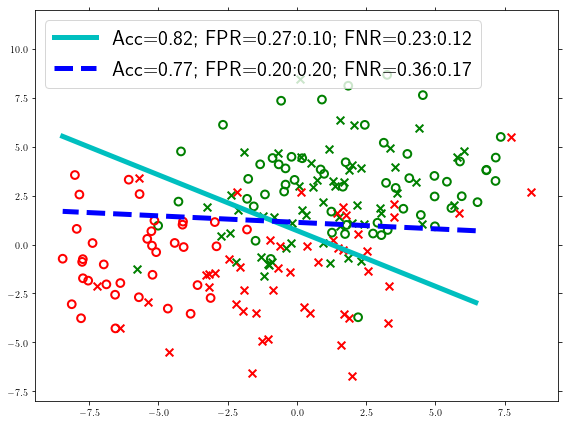


-----------------------------------------------------------------------------------



=== Constraints on FNR ===


Accuracy: 0.775
||  s  || FPR. || FNR. ||
||  0  || 0.62 || 0.12 ||
||  1  || 0.06 || 0.11 ||




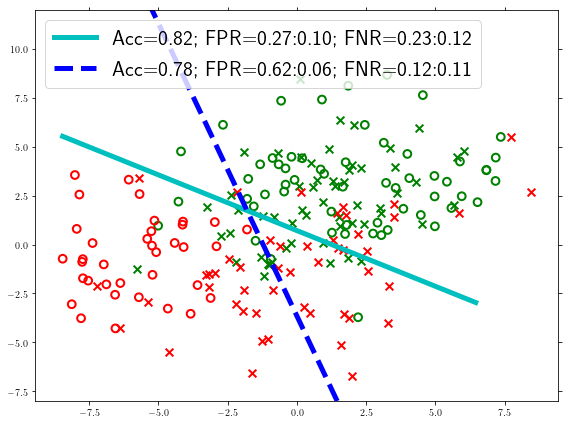


-----------------------------------------------------------------------------------



=== Constraints on both FPR and FNR ===


Accuracy: 0.628
||  s  || FPR. || FNR. ||
||  0  || 0.65 || 0.04 ||
||  1  || 0.77 || 0.00 ||




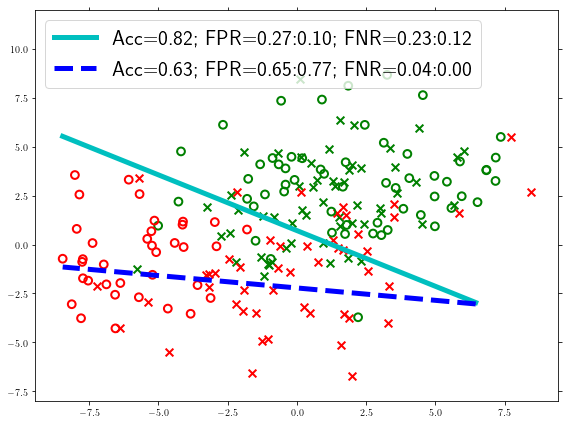


-----------------------------------------------------------------------------------



In [8]:
test_synthetic_data()

Let us first see the graph of the synthesized data

![data](data.png)

Green color means positive class (y = 1), while red color means negative class (y = -1). 'X' means s = 0 and 'O' means s = 1 (s is the sensitive attribute) You can see 'X' and 'O' actually have two different distributions. To demonstrate the disparate mistreatment effect more straight forward, you can see the following result when we build a **logistic regression classifier** for the synthetic dataset:

![p1](unconstrained.png)

When we achieve the maximal accuracy 0.821, FPR and FNR for two demographic groups (s = 0 or s = 1) are very different, so the classifier suffers from the disparate mistreatment effect

#### 1.2 Imposing Fairness Constraints on FPR

We then show if we add a constraint that the classifer should have same FPR for s = 0 or s = 1, we would sacrafice accuracy quite a bit:

![FPR](FPR.png)

We can also give the decision boundary comparisons:

![FPR2](syn_cons_dtype_1_cons_type_1.png)

The green line is the original optimized classifier, and the dashed blue line is the new classifier. We sacrifice 0.05 accuracy and FNR also increases!

#### 1.3 Imposing Fairness Constraints on FNR

We then show if we add a constraint that the classifer should have same FNR for s = 0 or s = 1, how much accuracy would we sacrifice?
![FNR](FNR.png)

We can also give the decision boundary comparisons:

![FNR2](syn_cons_dtype_1_cons_type_2.png)

The green line is the original optimized classifier, and the dashed blue line is the new classifier. We sacrifice 0.04 accuracy and FPR increases a lot!

#### 1.4 Imposing Fairness Constraints on both FPR and FNR

We then show if we add a constraint that the classifer should have same FPR and same FNR for s = 0 or s = 1, we actually cannot exactly achieve the goal, but can only approximate it.

![FPR & FNR](both.png)

We can also give the decision boundary comparisons:

![both](syn_cons_dtype_1_cons_type_4.png)

The green line is the original optimized classifier, and the dashed blue line is the new classifier. Though we achieve perfect FNR, the FPR is quite large and accuracy is sacrified by nearly 20%

### Part 2. Actual Data

We then apply the constraints on actual data: ProPublica COMPAS dataset. Basically, this dataset is about the crime offenders for different race groups. According to the paper, the data includes information on the offenders’ demographic features (gender, race, age), criminal history (charge for which the person was arrested, number of prior offenses) and the risk score assigned to the offender by COMPAS.The data also contains whether each individual recidivated after two years. 

Therefore, **race** is a sensitive attribute and **y** is whether the individual recidivated. Maybe sex is also a sensitive attribute, but the experiment is focusing on **race**.  Thus, it would be a perfect demonstration of disparate treatment effect. Let's see the results.  

#### 2.1 ProPublica COMPAS dataset

In [9]:
#You can have an overview of the data
pd.read_csv('compas-scores-two-years.csv')

,id,name,first,last,compas_screening_date,sex,dob,age,age_cat,race,...,v_decile_score,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid
0,1,miguel hernandez,miguel,hernandez,2013-08-14,Male,1947-04-18,69,Greater than 45,Other,...,1,Low,2013-08-14,2014-07-07,2014-07-14,0,0,327,0,0
1,3,kevon dixon,kevon,dixon,2013-01-27,Male,1982-01-22,34,25 - 45,African-American,...,1,Low,2013-01-27,2013-01-26,2013-02-05,0,9,159,1,1
2,4,ed philo,ed,philo,2013-04-14,Male,1991-05-14,24,Less than 25,African-American,...,3,Low,2013-04-14,2013-06-16,2013-06-16,4,0,63,0,1
3,5,marcu brown,marcu,brown,2013-01-13,Male,1993-01-21,23,Less than 25,African-American,...,6,Medium,2013-01-13,NaN,NaN,1,0,1174,0,0
4,6,bouthy pierrelouis,bouthy,pierrelouis,2013-03-26,Male,1973-01-22,43,25 - 45,Other,...,1,Low,2013-03-26,NaN,NaN,2,0,1102,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7209,10996,steven butler,steven,butler,2013-11-23,Male,1992-07-17,23,Less than 25,African-American,...,5,Medium,2013-11-23,2013-11-22,2013-11-24,0,1,860,0,0
7210,10997,malcolm simmons,malcolm,simmons,2014-02-01,Male,1993-03-25,23,Less than 25,African-American,...,5,Medium,2014-02-01,2014-01-31,2014-02-02,0,1,790,0,0
7211,10999,winston gregory,winston,gregory,2014-01-14,Male,1958-10-01,57,Greater than 45,Other,...,1,Low,2014-01-14,2014-01-13,2014-01-14,0,0,808,0,0
7212,11000,farrah jean,farrah,jean,2014-03-09,Female,1982-11-17,33,25 - 45,African-American,...,2,Low,2014-03-09,2014-03-08,2014-03-09,3,0,754,0,0


In [10]:
from propublica_compas_data_demo.demo_constraints import *

In [11]:
test_compas_data()

Looking for file 'compas-scores-two-years.csv' in the current directory...
File found in current directory..

Number of people recidivating within two years
-1    2795
 1    2483
dtype: int64


Features we will be using for classification are: ['intercept', 'age_cat_25 - 45', 'age_cat_Greater than 45', 'age_cat_Less than 25', 'race', 'sex', 'priors_count', 'c_charge_degree'] 

== Unconstrained (original) classifier ==


Accuracy: 0.668
||  s  || FPR. || FNR. ||
||  0  || 0.33 || 0.34 ||
||  1  || 0.20 || 0.55 ||



-----------------------------------------------------------------------------------



== Constraints on FPR ==


Accuracy: 0.648
||  s  || FPR. || FNR. ||
||  0  || 0.25 || 0.44 ||
||  1  || 0.28 || 0.47 ||



-----------------------------------------------------------------------------------



From above results, you can see accuracy decreases from 0.671 to 0.653, but the fairness actually improves a lot. More prominently, although we just put constraints on FPR, it actually also decreases the discrepency between FNR. Also, we notice that our results are slightly different from the ones with the paper (but very similar), this may happen due to the difference between Python 2 and 3, or the dataset has been updated.

#### 2.2 Credit Data

We are going to predict the credit card approval using Logistic Regression using 21 attributes. Details of code seen in **credit_constraints_data_demo**

In [12]:
from credit_constraints_data_demo.demo_credit_constraints import *

In [13]:
test_credit_data()

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'CREDIT_APPROVAL_STATUS', 'EMPLOYED_YEAR'],
      dtype='object')
Features we will be using for classification are: ['intercept', 'AMT_INCOME_TOTAL', 'FLAG_MOBIL', 'FLAG_EMAIL', 'MARITAL_STATUS', 'OWN_CAR', 'OWN_PROPERTY', 'CODE_GENDER', 'AGE', 'EMPLOYED_YEAR', 'EDU_Higher education', 'EDU_Incomplete higher', 'EDU_Lower secondary', 'EDU_Secondary / secondary special', 'HOU_House / apartment', 'HOU_Municipal apartment', 'HOU_Office apartment', 'HOU_Rented apartment', 'HOU_With parents', 'FAM_1.0', 'FAM_2.0', 'FAM_3.0'] 

== Unconstrained (original) classifier ==


Accuracy: 0.515
||  s  || FPR. || FNR. ||
||  0  || 0.38 || 0.58 ||
||  1  || 0.

From above results, you can see accuracy decreases from 0.515 to 0.514.This is quite little. However, noticing that the best classifier happens to have very close FPR for sensitive attribute, which means the unconstrained classifier itself **happens to be** very fair. We do not always have such luck.

### Part 3. Visualizations for Accuracy-Fairness Tradeoffs

The last part of the experiment demonstrates the accuracy-fairness when we gradually apply fairness constraints more "seriously" on the synthetic data. The paper proposes to measure fairness using the covariance between the users’
sensitive attributes and the signed distance between the feature vectors of misclassified users and the classifier decision boundary (details in page 4). Thus, we can vary the threshold of this covariance. The close this threshold to 0, the more stricter the fairness constraint would be.

We vary the threshold from 0 to 1 as the paper suggests and obtain similar results as the paper:

In [14]:
from synthetic_data_demo.fairness_acc_tradeoff import *

== Unconstrained (original) classifier ==


Accuracy: 0.800
||  s  || FPR. || FNR. ||
||  0  || 0.32 || 0.28 ||
||  1  || 0.09 || 0.10 ||



-----------------------------------------------------------------------------------

== Classifier with fairness constraint ==


Accuracy: 0.800
||  s  || FPR. || FNR. ||
||  0  || 0.32 || 0.28 ||
||  1  || 0.09 || 0.10 ||




Accuracy: 0.799
||  s  || FPR. || FNR. ||
||  0  || 0.32 || 0.29 ||
||  1  || 0.08 || 0.10 ||




Accuracy: 0.799
||  s  || FPR. || FNR. ||
||  0  || 0.31 || 0.29 ||
||  1  || 0.08 || 0.10 ||




Accuracy: 0.797
||  s  || FPR. || FNR. ||
||  0  || 0.31 || 0.30 ||
||  1  || 0.08 || 0.11 ||




Accuracy: 0.797
||  s  || FPR. || FNR. ||
||  0  || 0.29 || 0.31 ||
||  1  || 0.08 || 0.11 ||




Accuracy: 0.795
||  s  || FPR. || FNR. ||
||  0  || 0.29 || 0.32 ||
||  1  || 0.09 || 0.12 ||




Accuracy: 0.792
||  s  || FPR. || FNR. ||
||  0  || 0.28 || 0.33 ||
||  1  || 0.09 || 0.12 ||




Accuracy: 0.791
||  s  || FPR. || FNR. ||
||

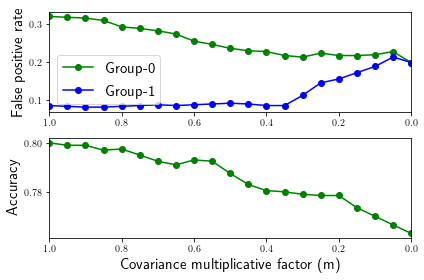

In [15]:
test_synthetic_data()

The plot demonstrates accuracy nearly monotomically decreases when fairness increases. However, the change is not uniform, and we may find a best balance point.

### Conclusion

We test all experiments done in this paper by examining, modifying and rewriting the 2018 github codes provided by the authors. The replication results are quite consistent to the original results although slight differences occur because of randomness or data updates. **Thus**, we are confident that the paper points out meaningful discoveries when we need to ensure the fairness by adding constraints on **disparate mistreatment**. The accuracy becomes a bit lower (not much) when we ensure identical or similar FPR or FNR for different demographic groups and the change is not uniform. Moreover, when we add constraints on FPR, it may also improve the discrepency between FNR.



### References

1. Zafar, Muhammad Bilal, et al. "Fairness beyond disparate treatment & disparate impact: Learning classification without disparate mistreatment." Proceedings of the 26th international conference on world wide web. 2017.


2. 2018 github: https://github.com/mbilalzafar/fair-classification


3. New github with replication results: https://github.com/TianXie1999/Replicate-Paper